In [36]:
import tensorflow as tf
import keras

In [10]:
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

Tensorflow Version: 2.13.0
Keras Version: 2.13.1


In [11]:
tf.config.list_physical_devices('GPU')

[]

In [12]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [13]:
#The following below code can be used to find out whether a CPU or GPU is in use
CheckList = ["GPU", "CPU"]
for device in CheckList:
    out_ = tf.config.list_physical_devices(device)
if len(out_) > 0:
    print(f"{device} is available")
    print("details\n",out_)
else:
    print(f"{device} not available")

CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [14]:
#Implementing perceptron with python
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd
plt.style.use("fivethirtyeight")

In [15]:
class Perceptron:
    
    def __init__(self, eta, epochs):
        self.weights = np.random.randn(3) * 1e-4
        print(f"self.weights: {self.weights}")
        self.eta = eta
        self.epochs = epochs
    def activationFunction(self, inputs, weights):
        z = np.dot(inputs, weights)
        return np.where(z > 0 , 1, 0)
    def fit(self, X, y):
        self.X = X
        self.y = y
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # concactination
        print(f"X_with_bias: \n{X_with_bias}")
        for epoch in range(self.epochs):
            print(f"for epoch: {epoch}")
            y_hat = self.activationFunction(X_with_bias, self.weights)
            print(f"predicted value: \n{y_hat}")
            error = self.y - y_hat
            print(f"error: \n{error}")
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
            print(f"updated weights: \n{self.weights}")
            print("#############\n")
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
        return self.activationFunction(X_with_bias, self.weights)

In [16]:
#AND Operation
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}
AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [18]:
X = AND.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [19]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [20]:
model = Perceptron(eta = 0.5, epochs=10)
model.fit(X,y)

self.weights: [-3.36741901e-05  2.60787649e-05  1.31793799e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 1 0 0]
error: 
0    0
1   -1
2    0
3    1
Name: y, dtype: int64
updated weights: 
[4.99966326e-01 2.60787649e-05 1.31793799e-05]
#############

for epoch: 1
predicted value: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[-3.36741901e-05 -4.99973921e-01  1.00001318e+00]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[4.99966326e-01 2.60787649e-05 5.00013179e-01]
#############

for epoch: 3
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[9.99966326e-01 5.00026079e-01 1.31793799e-05]
#############

for epoch: 4
predicted value: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[4.99966326e-01 2.6078764

In [21]:
model.predict(X)

array([0, 0, 0, 1])

In [22]:
model.weights

array([0.99996633, 0.50002608, 1.00001318])

In [23]:
#Saving and Loading model
import os
# saving model
dir_ = "Perceptron_model"
os.makedirs(dir_, exist_ok=True)
filename = os.path.join(dir_, 'AND_model.model')
joblib.dump(model, filename)


['Perceptron_model\\AND_model.model']

In [24]:
# load the model from drive
loaded_model = joblib.load(filename)
result = loaded_model.predict(X)
print(result)

[0 0 0 1]


In [25]:
#OR Operation
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}
OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [26]:
X = OR.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [27]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [28]:
model = Perceptron(eta = 0.5, epochs=10)
model.fit(X,y)

self.weights: [ 1.40664435e-04 -1.31433349e-05  1.73753800e-04]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights: 
[ 1.00014066  0.99998686 -1.49982625]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 1.00014066  0.99998686 -0.99982625]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 1.00014066  0.99998686 -0.49982625]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[1.00014066e+00 9.99986857e-01 1.73753800e-04]
#############

for epoch: 4
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[1.00014066e+00 9.99986857e-01 1.73753800e-04]
########

In [29]:
#XOR Operation
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}
XOR = pd.DataFrame(data)
XOR


,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [30]:
X = XOR.drop("y", axis=1) # axis = 1 >>> dropping across column
X
#Perceptron can only classify the linear problem like AND, OR operation because they were linear problem. 
#But in the case of XOR it couldn't classify correctly because it was a non-linear problem.

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [31]:
y = XOR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [32]:
model = Perceptron(eta = 0.5, epochs=50)
model.fit(X,y)

self.weights: [-7.35982492e-05  2.59223374e-05  1.44138822e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 1 0 0]
error: 
0    0
1    0
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99926402e-01  2.59223374e-05 -4.99985586e-01]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-7.35982492e-05 -4.99974078e-01  5.00014414e-01]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99926402e-01  2.59223374e-05 -4.99985586e-01]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-7.35982492e-05 -4.99974078e-01  5.00014414e-01]
#############

for epoch: 4
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99926402e-01

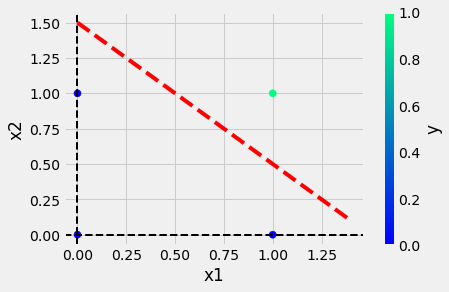

In [33]:
#Analysis with graph
AND.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)
x = np.linspace(0, 1.4) # >>> 50
y = 1.5 - 1*np.linspace(0, 1.4) # >>> 50
plt.plot(x, y, "r--")

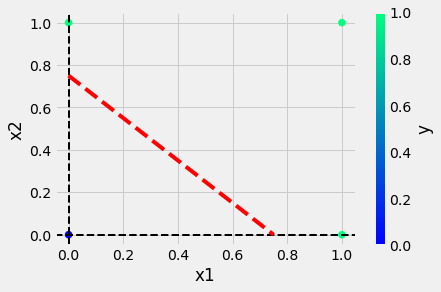

In [34]:
OR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y = 0, color ="black", linestyle ="--", linewidth=2)
plt.axvline(x = 0, color ="black", linestyle ="--", linewidth=2)
plt.plot(np.linspace(0,0.75), 0.75 - 1*np.linspace(0,0.75), 'r--');

<AxesSubplot:xlabel='x1', ylabel='x2'>

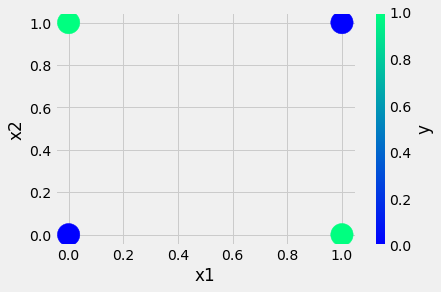

In [35]:
XOR.plot(kind="scatter", x="x1", y="x2", c="y", s=500, cmap="winter")
